1. imdb 영화리뷰 분류
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
- IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리되어 있음, 17MB 정도의 데이터셋)
- 영화 리뷰 50,000개의 데이터셋
- 학습용 데이터 25,000개와 검증용 데이터 25,000개, 각각 50%는 부정, 50%는 긍정 리뷰로 구성

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
np.random.seed(7)
top_words = 5000 # 상위 단어 5000개

# 학습용, 검증용 5:5
(X_train,y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
max_reivew_length = 500 # 리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_reivew_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_reivew_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
# create the model
embedding_vector_length = 32 # 벡터 사이즈
model = Sequential()

# 임베딩 레이어 Embedding(단어의 개수, 벡터크기, 입력사이즈(최대단어 개수))
model.add(Embedding(top_words, embedding_vector_length, input_length=max_reivew_length))

# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# hist = model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)
hist = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 14s 30ms/step - loss: 0.4752 - accuracy: 0.7654
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 0.3092 - accuracy: 0.8729
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2468 - accuracy: 0.9046
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2208 - accuracy: 0.9140
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1892 - accuracy: 0.9294
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2766 - accuracy: 0.8823
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1766 - accuracy: 0.9330
Epoch 8/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1407 - accuracy: 0.9488
Epoch 9/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1255 - accuracy: 0.9557
Epoch 10/10
391/391 [==============================] - 12s 30ms/step - loss: 0.129

In [5]:
# Final evaluation of the model
# scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
scores = model.evaluate(X_train, y_train, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 8s 10ms/step - loss: 0.0776 - accuracy: 0.9776
Accuracy: 97.76%


In [6]:
# scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 7s 10ms/step - loss: 0.4309 - accuracy: 0.8630
Accuracy: 86.30%


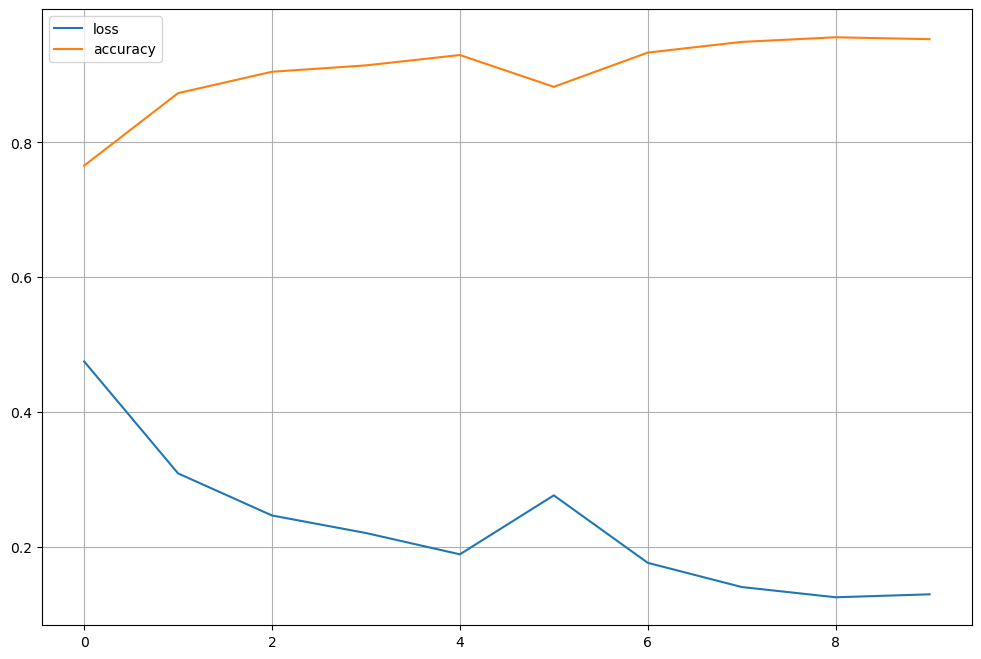

In [7]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

2. 로이터 뉴스 분류
- 뉴스 기사 분류: 다중 분류 문제
- 로이터 뉴스를 46개의 토픽으로 분류하는 신경망(다중분류)
- 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 데이터셋(케라스 내장 데이터셋)
- 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋 (46개의 토픽, 각 토픽은 최소 10개의 샘플이 있음)

In [8]:
from keras.datasets import reuters
# 로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen 상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [9]:
from tensorflow.keras.preprocessing import sequence
# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [10]:
from keras.utils import np_utils
# 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
model = Sequential()
# 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000, 100)) # 1000개의 단어가 입력되어 100차원으로 출력

# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100))
model.add(Dense(46, activation='softmax')) # 46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
hist = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 3s 20ms/step - loss: 2.7550 - accuracy: 0.3304 - val_loss: 2.4057 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 12ms/step - loss: 2.2799 - accuracy: 0.4079 - val_loss: 2.0678 - val_accuracy: 0.4930
Epoch 3/100
57/57 [==============================] - 1s 11ms/step - loss: 2.0384 - accuracy: 0.4958 - val_loss: 2.0715 - val_accuracy: 0.4847
Epoch 4/100
57/57 [==============================] - 1s 11ms/step - loss: 1.9484 - accuracy: 0.5097 - val_loss: 1.8449 - val_accuracy: 0.5281
Epoch 5/100
57/57 [==============================] - 1s 11ms/step - loss: 1.7754 - accuracy: 0.5413 - val_loss: 1.7742 - val_accuracy: 0.5309
Epoch 6/100
57/57 [==============================] - 1s 10ms/step - loss: 1.7064 - accuracy: 0.5582 - val_loss: 1.7364 - val_accuracy: 0.5403
Epoch 7/100
57/57 [==============================] - 1s 11ms/step - loss: 1.6315 - accuracy: 0.5825 - val_loss: 1.7010 - val_accuracy: 0.5476
Epoch 

In [13]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 3ms/step - loss: 1.4737 - accuracy: 0.6411

 정확도 : 0.6411


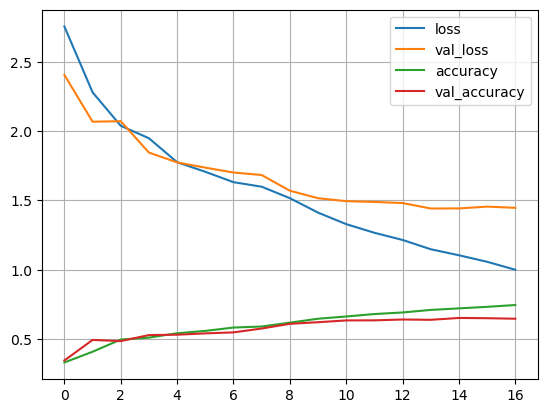

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [15]:
import numpy as np
pred = model.predict(X_test)
np.argmax(pred[12])

71/71 [==============================] - 1s 2ms/step


1

In [16]:
np.argmax(y_test[12])

1

3. 스팸메일 분류
- https://wikidocs.net/22894
- https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [17]:
import pandas as pd
df = pd.read_csv('../data/spam/spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
# ham => 0, spam => 1 로 바꾸어 저장
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df.shape

(5572, 5)

0    4825
1     747
Name: v1, dtype: int64


<AxesSubplot:>

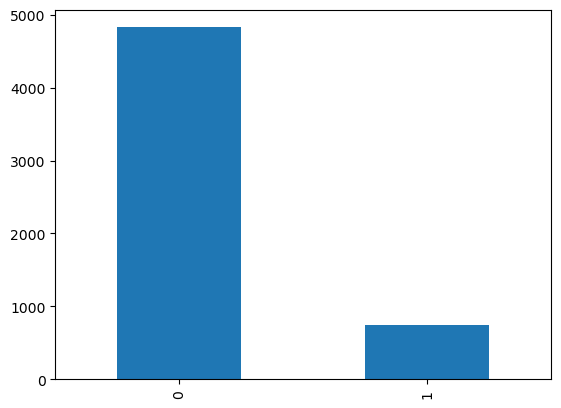

In [20]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

In [21]:
X = df[['v2']] #독립변수
y = df['v1'] #종속변수
print(X[:3])
print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


0    747
1    747
Name: v1, dtype: int64


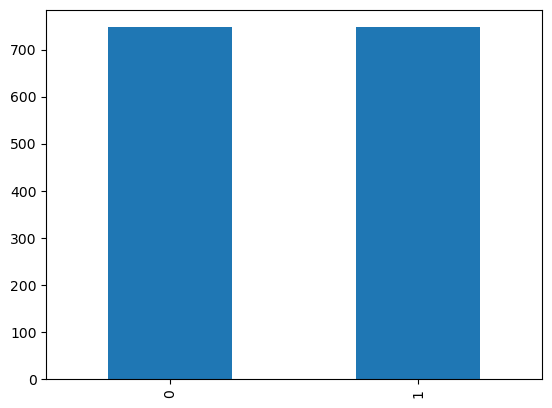

In [22]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=['v2'])
y_samp = pd.DataFrame(data=y_sample, columns=['v1'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
print(df_samp['v1'].value_counts())
df_samp['v1'].value_counts().plot(kind='bar')
X = df_samp['v2']
y = df_samp['v1']

In [23]:
from keras.preprocessing.text import Tokenizer
# 단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X) # 텍스트를 시퀀스로 변환(단어의 인덱스로만 구성된 새로운 리스트)
sequences = tokenizer.texts_to_sequences(X)
print(sequences[:5])


[[1486, 49, 802, 1487, 18, 337, 87, 26, 2273, 45, 27, 173], [1148, 14, 4, 25, 614], [174, 149, 4, 2, 189, 5, 105, 17, 615, 614], [946, 88, 38, 400, 703, 1, 2274, 1488, 130, 2275, 26, 1489, 242, 45, 703, 1, 2276, 2277, 24, 46, 1149], [7, 291, 1490, 803, 554, 53, 317, 26, 804, 704, 25, 63, 47, 217, 1491, 13, 435, 338, 97]]


In [24]:
# 단어와 인덱스 목록
word_to_index = tokenizer.word_index
print(word_to_index)

{'to': 1, 'you': 2, 'a': 3, 'call': 4, 'i': 5, 'the': 6, 'u': 7, 'your': 8, 'for': 9, 'is': 10, 'now': 11, 'and': 12, '2': 13, 'free': 14, 'or': 15, 'have': 16, 'in': 17, 'on': 18, 'ur': 19, 'of': 20, 'txt': 21, '4': 22, 'with': 23, 'from': 24, 'me': 25, 'my': 26, 'get': 27, 'are': 28, 'text': 29, 'it': 30, 'mobile': 31, 'stop': 32, 'just': 33, 'no': 34, 'this': 35, 'claim': 36, 'reply': 37, 'we': 38, 'be': 39, 'out': 40, 'if': 41, 'www': 42, 'that': 43, 'do': 44, 'can': 45, 'our': 46, 'at': 47, 'prize': 48, 'only': 49, 'not': 50, 'will': 51, 'send': 52, 'so': 53, 'new': 54, 'cash': 55, 'go': 56, 'won': 57, 'please': 58, 'but': 59, '150p': 60, "i'm": 61, 't': 62, 'up': 63, 'win': 64, 'uk': 65, 'nokia': 66, 'week': 67, 'what': 68, 'urgent': 69, 'all': 70, 'know': 71, 'who': 72, 'by': 73, 'msg': 74, '1': 75, 'as': 76, 'tone': 77, 'contact': 78, 'want': 79, 'com': 80, 'been': 81, 'service': 82, 'ok': 83, '50': 84, 'good': 85, 'co': 86, 'phone': 87, 'then': 88, 'r': 89, 'customer': 90, '16

메일의 최대 길이 : 77
메일의 평균 길이 : 19.855422


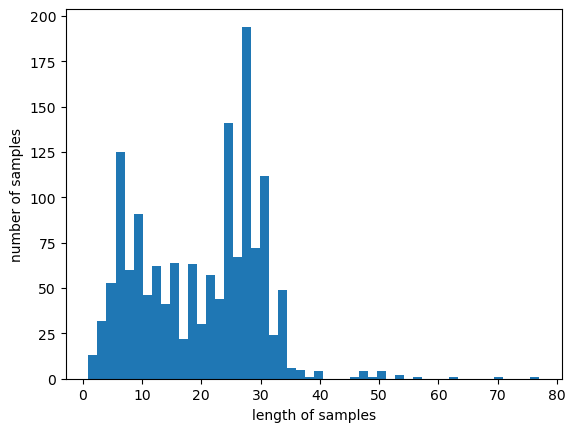

In [25]:
import matplotlib.pyplot as plt
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data)) / len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples') # 길이
plt.ylabel('number of samples') # 샘플수
plt.show()

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 최대 사이즈에 맞추어 빈칸에 0으로 채우기 (제로 패딩)
data = pad_sequences(X_data, maxlen=77)
print("학습용 데이터의 크기(shape): ", data.shape)
print(data[:1])

학습용 데이터의 크기(shape):  (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  802 1487   18
   337   87   26 2273   45   27  173]]


In [27]:
# 학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=10)

In [28]:
# 일반 신경망
# from keras.layers import Embedding, Dense, LSTM, SimpleRNN
# from keras.models import Sequential
# model = Sequential()
# model.add(Dense(64, input_shape=(77,),  activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

In [29]:
# 순환 신경망
from keras.layers import Embedding, Dense, LSTM, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(len(word_to_index) + 1, 32))
model.add(SimpleRNN(32)) # output size 32
# model.add(LSTM(32)) # Long Short Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 3s 119ms/step - loss: 0.6277 - accuracy: 0.6841 - val_loss: 0.5220 - val_accuracy: 0.8159
Epoch 2/10
15/15 [==============================] - 2s 101ms/step - loss: 0.4323 - accuracy: 0.8473 - val_loss: 0.4499 - val_accuracy: 0.8368
Epoch 3/10
15/15 [==============================] - 1s 97ms/step - loss: 0.3231 - accuracy: 0.8860 - val_loss: 0.3831 - val_accuracy: 0.8954
Epoch 4/10
15/15 [==============================] - 2s 103ms/step - loss: 0.2141 - accuracy: 0.9446 - val_loss: 0.2934 - val_accuracy: 0.8996
Epoch 5/10
15/15 [==============================] - 1s 99ms/step - loss: 0.1339 - accuracy: 0.9655 - val_loss: 0.2196 - val_accuracy: 0.9247
Epoch 6/10
15/15 [==============================] - 1s 96ms/step - loss: 0.0891 - accuracy: 0.9801 - val_loss: 0.1502 - val_accuracy: 0.9498
Epoch 7/10
15/15 [==============================] - 2s 102ms/step - loss: 0.0665 - accuracy: 0.9822 - val_loss: 0.1596 - val_accuracy: 0.9665
Epoch 8/1

In [31]:
model.evaluate(X_test, y_test.values, verbose=0)

[0.17598924040794373, 0.9364548325538635]

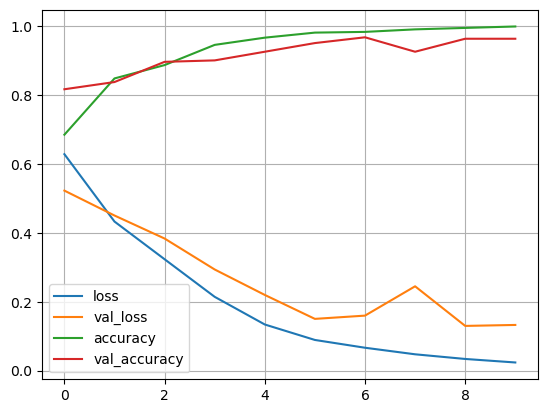

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [33]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 131ms/step


array([[0.933095  ],
       [0.02195271],
       [0.9920076 ]], dtype=float32)

4. 한글텍스트 분류

In [34]:
import pandas as pd
train_data = pd.read_csv('../data/text/ratings_train.csv', encoding='ms949')
test_data = pd.read_csv('../data/text/ratings_test.csv', encoding='ms949')

In [35]:
len(train_data)

150000

In [36]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [37]:
len(test_data)

50000

In [38]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [39]:
# 중복되지 않은 데이터 확인
train_data['document'].nunique(), train_data['label'].nunique()

(146157, 2)

In [40]:
# 중복값 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
len(train_data)

146158

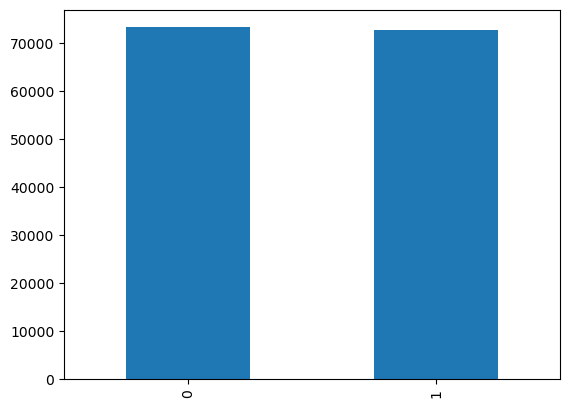

In [41]:
import matplotlib.pyplot as plt
train_data['label'].value_counts().plot(kind = 'bar')
plt.show()

In [42]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [43]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
train_data.isnull().values.any()

False

In [44]:
# 특수문자, 기호 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data[:3]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11456\1413274399.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


,document,label
0,아더빙진짜짜증나네요목소리,0
1,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [45]:
import numpy as np
# 공백 제거
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11456\2731013028.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")


document    784
label         0
dtype: int64

In [46]:
train_data.loc[train_data.document.isnull()][:3]

,document,label
404,NaN,0
412,NaN,1
470,NaN,1


In [47]:
# null 샘플 제거
train_data = train_data.dropna(how = 'any')
len(train_data)

145373

In [48]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
len(test_data)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11456\2044650692.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11456\2044650692.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "")


48844

In [49]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [50]:
from konlpy.tag import Okt
okt = Okt()
X_train = []
# 형태소 분석
# for sentence in train_data['document']:
for sentence in train_data['document'][:10000]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [51]:
print(X_train[:3])

[['아더', '빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [52]:
# 테스트 데이터에 대한 토큰화
X_test = []
# for sentence in test_data['document']:
for sentence in test_data['document'][:10000]:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [54]:
# 출현빈도가 3회 미만인 단어들
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print(total_cnt) # 단어집합의 크기
print(rare_cnt) # 희귀단어수

13372
8870


In [55]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4503


In [56]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train) # 텍스트를 숫자 시퀀스로 변환
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [57]:
import joblib
joblib.dump(tokenizer, '../models/tokenizer.h5')

['../models/tokenizer.h5']

In [58]:
print(X_train[:3])

[[17, 231, 820], [790, 390, 40, 683, 1, 366, 1898, 27, 1066, 725, 19], [206, 1122, 594, 3466, 2, 232, 6]]


In [59]:
y_train = np.array(train_data['label'][:10000])
y_test = np.array(test_data['label'][:10000])

In [60]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

In [61]:
cnt = 0
for s in X_train:
    if(len(s) <= 30):
        cnt = cnt + 1
# 최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100

95.45

In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [64]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         450300    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 567,677
Trainable params: 567,677
Non-trainable params: 0
_________________________________________________________________


In [67]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('../models/RNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
123/125 [============================>.] - ETA: 0s - loss: 0.2154 - acc: 0.9127
Epoch 1: val_acc improved from -inf to 0.79950, saving model to ../models\RNN_model.h5
125/125 [==============================] - 1s 11ms/step - loss: 0.2167 - acc: 0.9122 - val_loss: 0.4924 - val_acc: 0.7995
Epoch 2/10
121/125 [============================>.] - ETA: 0s - loss: 0.2082 - acc: 0.9152
Epoch 2: val_acc did not improve from 0.79950
125/125 [==============================] - 1s 10ms/step - loss: 0.2067 - acc: 0.9161 - val_loss: 0.5386 - val_acc: 0.7980
Epoch 3/10
119/125 [===========================>..] - ETA: 0s - loss: 0.1958 - acc: 0.9213
Epoch 3: val_acc did not improve from 0.79950
125/125 [==============================] - 1s 9ms/step - loss: 0.1943 - acc: 0.9222 - val_loss: 0.5813 - val_acc: 0.7930
Epoch 4/10
119/125 [===========================>..] - ETA: 0s - loss: 0.1835 - acc: 0.9270
Epoch 4: val_acc did not improve from 0.79950
125/125 [==============================] - 1s 

In [68]:
loaded_model = load_model('../models/RNN_model.h5')
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4936 - acc: 0.7973


[0.4936039447784424, 0.7972999811172485]

In [69]:
def review_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen=max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if (score > 0.5):
        print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다. \n")
    else:
        print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다. \n")

In [70]:
review_predict('연기는 잔잔하게 볼 만 합니다')

1/1 [==============================] - 0s 311ms/step
96.88% 확률로 긍정 리뷰입니다. 



In [71]:
review_predict('영화의 주제가 뭔지 모르겠음')

1/1 [==============================] - 0s 19ms/step
91.28% 확률로 부정 리뷰입니다. 



In [72]:
review_predict('익살스런 연기가 돋보였던 영화')

1/1 [==============================] - 0s 19ms/step
97.86% 확률로 긍정 리뷰입니다. 



In [73]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 21ms/step
97.86% 확률로 부정 리뷰입니다. 



In [74]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다 그러나 손흥민은 있습니다')

1/1 [==============================] - 0s 20ms/step
95.24% 확률로 부정 리뷰입니다. 



6. 문장 만들기

In [75]:
# 점진적으로 메모리 사용량 늘리기
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [76]:
import pandas as pd
df = pd.read_csv("../data/text/ratings_all.csv", encoding="ms949")
df = df[df['label'] == 1]
df = df.sample(frac=1)
df

,document,label
67971,좋은영화네요!!!,1
184652,저도 이 영화 꼭좀 구하고 싶은데...,1
178362,누적관객수 14 돌파! ㅋㅋ,1
19141,이거 평점이 왤케 낮지?? 좋은 영환데.,1
62209,톰크루즈는 연기 가 아니라 그냥 본인같아;; 진짜 대단,1
...,...,...
107195,평점 너무 낮다!! 동화의 주연들이 조연이 되는 참신함이 좋았다.,1
21557,나름 재미있었음 ㅋ ㅋ ㅋ ~,1
99573,참 사회생활안해본 어린애들쓴글보면 웃기네 실제로 저런일이 본인한테 닥치면 그때도 어...,1
117295,저 포스터 만든 놈을 대인지뢰위에 앉혀놓고 싶다,1


In [77]:
text = '\n'.join(map(str,df['document'].values[10000:13000]))
text[:100]

'황홀했던 13주 였다... 칼세이건이 그립다\n내생의 최고의 드라마\n재밌다\n아이러브 밀라요보비치 ㅋㅋㅋㅋㅋㅋ\n이건 영화가 아니라 혁명\n인생 최고의 영화\n한마디로 이 영화 정말 괜찮다'

In [78]:
len(text)

108720

In [79]:
# 정수 인코딩, 단어에 번호
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
vocab_size = len(t.word_index)+1
print(vocab_size) # 단어 집합 사이즈

12882


In [80]:
t.word_index

{'영화': 1,
 '정말': 2,
 '너무': 3,
 '진짜': 4,
 '이': 5,
 '잘': 6,
 '수': 7,
 '보고': 8,
 '더': 9,
 '본': 10,
 '최고': 11,
 '최고의': 12,
 'ㅋㅋ': 13,
 '이런': 14,
 '그': 15,
 '영화를': 16,
 '봤는데': 17,
 '있는': 18,
 '왜': 19,
 '드라마': 20,
 '재밌게': 21,
 '연기': 22,
 '다시': 23,
 '다': 24,
 '꼭': 25,
 '역시': 26,
 '평점이': 27,
 '그냥': 28,
 '좋은': 29,
 '영화가': 30,
 '가장': 31,
 '것': 32,
 '참': 33,
 '완전': 34,
 'ㅠㅠ': 35,
 '좀': 36,
 '내가': 37,
 '난': 38,
 '영화는': 39,
 '이렇게': 40,
 '마지막': 41,
 '그리고': 42,
 '재미있게': 43,
 'ㅎㅎ': 44,
 'ㅋ': 45,
 '아': 46,
 '영화입니다': 47,
 '볼': 48,
 '연기가': 49,
 '평점': 50,
 '굿': 51,
 '또': 52,
 '내': 53,
 '작품': 54,
 '영화다': 55,
 '이거': 56,
 '한': 57,
 '넘': 58,
 '하는': 59,
 '많이': 60,
 '10점': 61,
 '좋다': 62,
 '여운이': 63,
 '봐도': 64,
 '대한': 65,
 '아름다운': 66,
 '한번': 67,
 '지금': 68,
 '보는': 69,
 '재밌다': 70,
 'ㅠ': 71,
 '좋고': 72,
 '말이': 73,
 '오랜만에': 74,
 '없는': 75,
 'ㅋㅋㅋ': 76,
 '만든': 77,
 '모두': 78,
 '이야기': 79,
 '이건': 80,
 '너무나': 81,
 '명작': 82,
 '많은': 83,
 '배우들의': 84,
 '재밌음': 85,
 '최고다': 86,
 '이게': 87,
 '할': 88,
 '끝까지': 89,
 '봤던': 90,
 '같다': 91

In [81]:
sequences = list()
for line in text.split('\n'): # 문장 나누기
    encoded = t.texts_to_sequences([line])[0] # 단어를 숫자로 변환
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)
print(len(sequences))

20680


In [82]:
sequences

[[2425, 2426],
 [2425, 2426, 626],
 [2425, 2426, 626, 2427],
 [2425, 2426, 626, 2427, 627],
 [1271, 12],
 [1271, 12, 20],
 [2428, 2429],
 [2428, 2429, 2430],
 [80, 30],
 [80, 30, 105],
 [80, 30, 105, 857],
 [284, 12],
 [284, 12, 1],
 [1272, 5],
 [1272, 5, 1],
 [1272, 5, 1, 2],
 [1272, 5, 1, 2, 858],
 [489, 1273],
 [489, 1273, 1274],
 [489, 1273, 1274, 2431],
 [489, 1273, 1274, 2431, 85],
 [1275, 1276],
 [1275, 1276, 628],
 [1275, 1276, 628, 859],
 [1275, 1276, 628, 859, 2432],
 [1275, 1276, 628, 859, 2432, 490],
 [1275, 1276, 628, 859, 2432, 490, 1277],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9, 2433],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9, 2433, 2434],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9, 2433, 2434, 7],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9, 2433, 2434, 7, 2435],
 [1275, 1276, 628, 859, 2432, 490, 1277, 36, 9, 2433, 2434, 7, 2435, 2436],
 [2437, 860],
 [243

In [84]:
max_len = max(len(l) for l in sequences)
print(max_len)

38


In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences,maxlen=max_len,padding='pre')
sequences # 제로패딩

array([[    0,     0,     0, ...,     0,  2425,  2426],
       [    0,     0,     0, ...,  2425,  2426,   626],
       [    0,     0,     0, ...,  2426,   626,  2427],
       ...,
       [    0,     0,     0, ..., 12880,  2121, 12881],
       [    0,     0,     0, ...,  2121, 12881,     9],
       [    0,     0,     0, ..., 12881,     9,  1709]])

In [86]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:,-1]

In [87]:
from keras.utils import np_utils
# 원핫인코딩
y = np_utils.to_categorical(y, num_classes=vocab_size)
# vocab_size 단어수
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(Embedding(vocab_size, 500, input_length=max_len - 1)) # 단어수, 백터크기, 입력크기
model.add(LSTM(128))
model.add(Dense(vocab_size,activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 500)           6441000   
                                                                 
 lstm (LSTM)                 (None, 128)               322048    
                                                                 
 dense (Dense)               (None, 12882)             1661778   
                                                                 
Total params: 8,424,826
Trainable params: 8,424,826
Non-trainable params: 0
_________________________________________________________________


In [89]:
# model.fit(X,y,epochs=20) 
# 메모리 부족으로 학습이 실패함

Epoch 1/20
647/647 [==============================] - 15s 21ms/step - loss: 9.5477 - accuracy: 0.0154
Epoch 2/20
647/647 [==============================] - 14s 21ms/step - loss: 8.4948 - accuracy: 0.0240
Epoch 3/20
647/647 [==============================] - 14s 21ms/step - loss: 7.0504 - accuracy: 0.0441
Epoch 4/20
647/647 [==============================] - 14s 21ms/step - loss: 5.3405 - accuracy: 0.1369
Epoch 5/20
647/647 [==============================] - 14s 21ms/step - loss: 3.8606 - accuracy: 0.2973
Epoch 6/20
647/647 [==============================] - 14s 21ms/step - loss: 2.8176 - accuracy: 0.4376
Epoch 7/20
647/647 [==============================] - 14s 21ms/step - loss: 2.1593 - accuracy: 0.5391
Epoch 8/20
647/647 [==============================] - 14s 21ms/step - loss: 1.7195 - accuracy: 0.6123
Epoch 9/20
647/647 [==============================] - 14s 21ms/step - loss: 1.5338 - accuracy: 0.6457
Epoch 10/20
647/647 [==============================] - 14s 21ms/step - loss: 1.415

In [90]:
import os
import glob
[os.remove(f) for f in glob.glob('*.h5')]

[]

In [96]:
import time
from keras.models import load_model
x_size = len(X)
n = 800
for i in range(0, x_size, n):
    print('step', int(i/n)+1, '/', int(x_size/n))
    X1 = X[i:min(i + n, x_size)]
    y1 = y[i:min(i + n, x_size)]
    model.fit(X1, y1, batch_size=64, epochs=30, verbose=1)
    model.save(f'../models/sentence/sentence{int(i/n)}.h5')
    tf.keras.backend.clear_session()
    del model
    time.sleep(2)
    model = load_model(f'../models/sentence/sentence{int(i/n)}.h5')

step 1 / 25
Epoch 1/30
13/13 [==============================] - 2s 26ms/step - loss: 9.3839 - accuracy: 0.0075
Epoch 2/30
13/13 [==============================] - 0s 24ms/step - loss: 7.2642 - accuracy: 0.0162
Epoch 3/30
13/13 [==============================] - 0s 24ms/step - loss: 6.5667 - accuracy: 0.0113
Epoch 4/30
13/13 [==============================] - 0s 24ms/step - loss: 6.1253 - accuracy: 0.0188
Epoch 5/30
13/13 [==============================] - 0s 24ms/step - loss: 5.5353 - accuracy: 0.0275
Epoch 6/30
13/13 [==============================] - 0s 27ms/step - loss: 4.8358 - accuracy: 0.0700
Epoch 7/30
13/13 [==============================] - 0s 23ms/step - loss: 4.0354 - accuracy: 0.1538
Epoch 8/30
13/13 [==============================] - 0s 24ms/step - loss: 3.2068 - accuracy: 0.3537
Epoch 9/30
13/13 [==============================] - 0s 23ms/step - loss: 2.4082 - accuracy: 0.5725
Epoch 10/30
13/13 [==============================] - 0s 23ms/step - loss: 1.6668 - accuracy: 0.74

In [97]:
def sequence_generation(model,t,current_word,n):
    init_word = current_word
    sentence = ''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded],maxlen=max_len-1,padding='pre')
        pred = model.predict(encoded,verbose=0)
        result = np.argmax(pred,axis=1)
        for word,index in t.word_index.items():
            if index == result:
                break
        current_word = current_word+' '+word
        sentence = sentence +' '+word
    sentence = init_word+sentence
    return sentence

In [98]:
print(sequence_generation(model,t,'너무',5))
print(sequence_generation(model,t,'진짜',5))
print(sequence_generation(model,t,'역시',5))
print(sequence_generation(model,t,'완전',5))
print(sequence_generation(model,t,'왜케',5))
print(sequence_generation(model,t,'오랜만에',5))
print(sequence_generation(model,t,'큰',5))
print(sequence_generation(model,t,'낭만적',5))
print(sequence_generation(model,t,'정말',5))

너무 다시 보고싶은데 어디에서 구할수 있나요
진짜 우리 주위의 이야기 같아서 더욱공감하고
역시 인생은 욕심을 그가 이는 다시
완전 잘 그려냈다 재밌는영화 저이거 4번봄ㅋㅋㅋㅋ근데왜
왜케 더 재밌음 미드 없이 재밌다
오랜만에 다시 봤는데 권상우의 대사가 아직도
큰 멋진 사극이 시작되서 정말 좋아하는
낭만적 ㄷ ㄷ 알았는데 연출 은은한
정말 오랜만에 영화다운 영화를 봤다 태어나서
